# 물체 탐지(Object detection) - YOLO Keras

DarkNet의 모델을 Keras로 변환하여 물체 탐지 실행.

https://github.com/qqwweee/keras-yolo3


## 프로젝트 다운로드


In [1]:
%cd /content

!rm -rf keras-yolo3
# !git clone https://github.com/qqwweee/keras-yolo3
!git clone https://github.com/dhrim/keras-yolo3

/content
Cloning into 'keras-yolo3'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 150 (delta 0), reused 2 (delta 0), pack-reused 145
Receiving objects: 100% (150/150), 159.07 KiB | 6.92 MiB/s, done.
Resolving deltas: 100% (66/66), done.


## YOLO3 모델 다운로드


In [2]:
%cd /content/keras-yolo3
!wget https://pjreddie.com/media/files/yolov3.weights

/content/keras-yolo3
--2021-07-22 16:47:18--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  21.4MB/s    in 12s     

2021-07-22 16:47:31 (19.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



## 모델 파일 변환

DarkNet의 모델파일을 Keras에서 사용할 수 있는 모델 파일로 변환한다.


- convert.py : 변환 실행 파일
- yolov3.cfg : Darknet에서 사용하는 모델 구조 정의 파일
- yolov3.weight : Darknet으로 학습된 모델 파일

실행 결과로 다음의 h5 파일로 변환된다. 
- yolov3.h5 : 변환된 모델 파일


In [3]:
!head -40 yolov3.cfg 

[net]
# Testing
batch=1
subdivisions=1
# Training
# batch=64
# subdivisions=16
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1


In [9]:
# 실행하기전 기존것이 있다면 삭제
!rm -rf yolov3.h5

# 실행 
%run convert.py yolov3.cfg yolov3.weights yolov3.h5

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsi

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Saved Keras model to yolov3.h5
Read 62001757 of 62001757.0 from Darknet weights.


## 물체 탐지 실행

다음의 파일이 사용된다.
- yolov3.h5 : 모델 파일
- model_data/coco_classes.txt : 클래스 이름


--2021-07-22 16:47:49--  http://beltlineorg-wpengine.netdna-ssl.com/wp-content/uploads/2012/12/IMG_5669-flickr-websized.jpg
Resolving beltlineorg-wpengine.netdna-ssl.com (beltlineorg-wpengine.netdna-ssl.com)... 94.31.29.99
Connecting to beltlineorg-wpengine.netdna-ssl.com (beltlineorg-wpengine.netdna-ssl.com)|94.31.29.99|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89406 (87K) [image/jpeg]
Saving to: ‘street_view.jpg’

street_view.jpg     100%[===================>]  87.31K  --.-KB/s    in 0.1s    

2021-07-22 16:47:49 (640 KB/s) - ‘street_view.jpg’ saved [89406/89406]



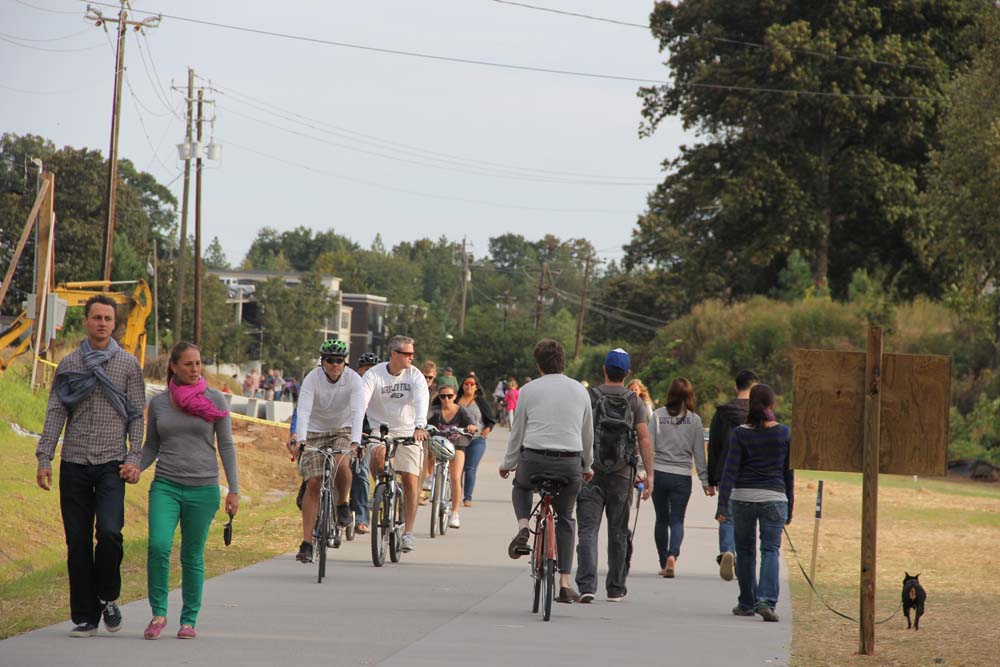

In [5]:
!wget -O street_view.jpg http://beltlineorg-wpengine.netdna-ssl.com/wp-content/uploads/2012/12/IMG_5669-flickr-websized.jpg

from IPython.display import Image, display
display(Image(filename='street_view.jpg')) 

In [6]:
!cat model_data/coco_classes.txt

person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
sofa
pottedplant
bed
diningtable
toilet
tvmonitor
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


In [7]:
from IPython.display import display 
from PIL import Image
from yolo import YOLO

def do_object_detection(file, model_path, class_path):
  
  yolo = YOLO(model_path=model_path, classes_path=class_path)

  image = Image.open(file)
  result_image = yolo.detect_image(image)

  display(result_image)


Instructions for updating:
Colocations handled automatically by placer.
yolov3.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 20 boxes for img
dog 0.91 (900, 571) (929, 631)
bicycle 0.54 (433, 439) (461, 527)
bicycle 0.69 (425, 451) (449, 537)
bicycle 0.85 (368, 438) (421, 567)
bicycle 0.95 (297, 438) (352, 574)
bicycle 0.99 (519, 478) (575, 617)
person 0.34 (495, 365) (545, 564)
person 0.54 (252, 368) (269, 403)
person 0.55 (270, 369) (286, 401)
person 0.71 (501, 376) (518, 423)
person 0.89 (455, 371) (489, 515)
person 0.96 (429, 377) (482, 510)
person 0.99 (290, 335) (370, 547)
person 0.99 (572, 353) (650, 599)
person 0.99 (358, 335) (437, 536)
person 1.00 (129, 341) (239, 645)
person 1.00 (719, 387) (793, 620)
person 1.00 (501, 338) (591, 600)
person 1.00 (645, 378) (708, 583)
person 1.00 (30, 298) (145, 638)
30.453439771000006


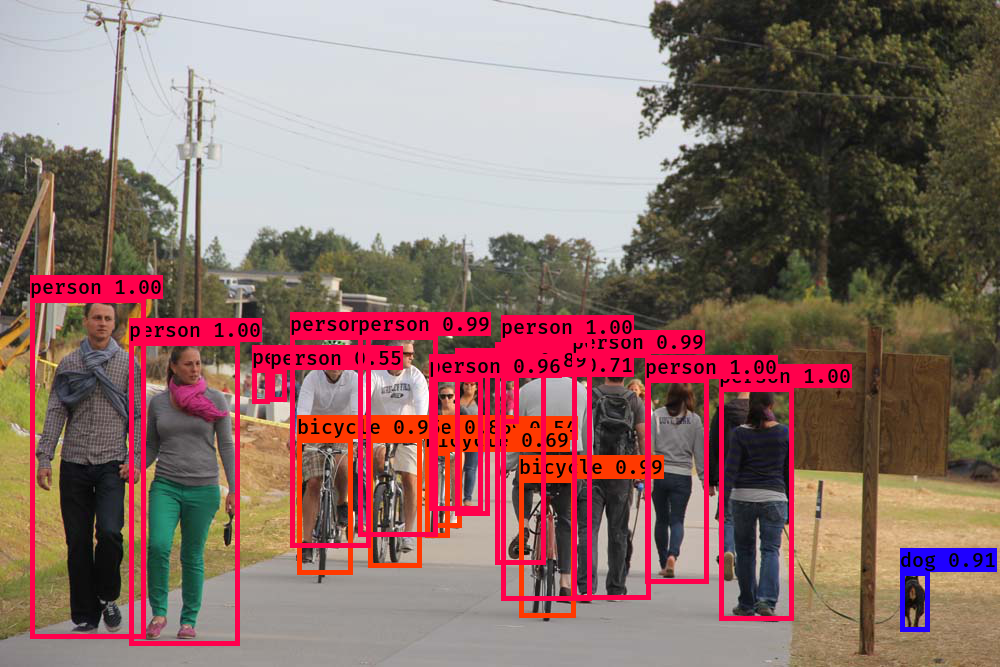

In [8]:
do_object_detection('street_view.jpg', 'yolov3.h5', 'model_data/coco_classes.txt')

